# Import Libraries

In [1]:
import pandas as pd

# Load Data

In [2]:
# load dataset
pima = pd.read_csv("diabetes.csv")

# EDA

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.shape

(768, 9)

In [6]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Prepare the data

In [14]:
#split dataset in features and target variable
X = pima.iloc[:, :-1] # Features
y = pima.Outcome # Target variable

In [16]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

C:\Users\Umaima\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

# Training the Algorithm

In [19]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Making Predictions

In [20]:
y_pred = logreg.predict(X_test)

In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0


# Evaluating the Algorithm

In [23]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

In [24]:
# Visualizing Confusion Matrix using Heatmap
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,257.44,'Predicted label')

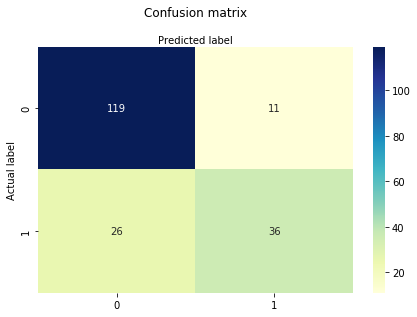

In [25]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
# Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


Well, you got a classification rate of 80%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. 
In other words, you can say, when a model makes a prediction, how often it is correct. 

In our prediction case, when Logistic Regression model predicted patients are going to suffer from diabetes, that patients have it 76% of the time.

Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 58% of the time.

In [29]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]
y_pred_proba

array([0.8953482 , 0.21342491, 0.14092954, 0.6029929 , 0.1721052 ,
       0.07618999, 0.6897674 , 0.74874989, 0.44194684, 0.37594176,
       0.55665959, 0.89819749, 0.30220252, 0.24845752, 0.17309173,
       0.20594601, 0.80573236, 0.0682363 , 0.39235964, 0.31747288,
       0.567398  , 0.35856531, 0.35670843, 0.09489465, 0.1048334 ,
       0.37839105, 0.08592904, 0.83453131, 0.17524403, 0.20001024,
       0.47316878, 0.28456496, 0.13221445, 0.48358822, 0.17640026,
       0.64084987, 0.47388052, 0.13074598, 0.39697882, 0.68509146,
       0.31030363, 0.21882425, 0.23543269, 0.75034729, 0.72360888,
       0.03388344, 0.1553343 , 0.27928549, 0.39201687, 0.30322826,
       0.43029527, 0.26067223, 0.82045027, 0.45873798, 0.18598846,
       0.01271975, 0.11070728, 0.40951218, 0.30268952, 0.24022652,
       0.6324217 , 0.47478652, 0.16060919, 0.71442774, 0.6113004 ,
       0.83703701, 0.62341807, 0.18641853, 0.39963498, 0.16071474,
       0.17466897, 0.53121348, 0.14186398, 0.86152842, 0.73949

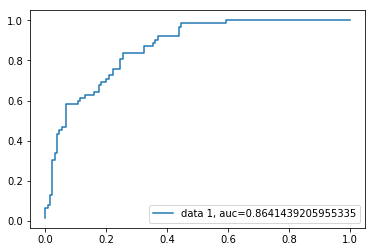

In [31]:
# ROC Curve
# Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. 
# It shows the tradeoff between sensitivity and specificity.

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.86. 

It means there is 86% chance that model will be able to distinguish between positive class and negative class.

AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.